In [1]:
#%pip install ipyparallel
#%pip install Cython -U  imbalanced-learn scikit-learn==0.22

In [2]:
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#import FDC_RF functionalities
from FDC_RF import *
from main_FDC import *

In [3]:
Sites = [1,2]
#data1 = pd.read_csv("small.csv")
#data2 = pd.read_csv("small.csv")

In [4]:
dictIni = initializeEnv()


...Reading Config File!!!


In [5]:
#Load data, build and group local forests
for site in Sites:
    Xtrain, Xtest, ytrain, ytest = LoadData(str(site),dictIni["dsName"], dictIni["shareMDir"])
    mdlsByAcc, fdcMdl, delta = genLocalModel(Xtrain, ytrain,dictIni,0.8,str(site))

aggDataSets(dictIni["shareMDir"])

***** Processing 1 *****
Reading Data Set!!!
Number of Samples:240, Features:2054
... Generating Local Model
Number of cores: 8
Threshold used:0.55
No. nModel: 1 160
No. nModel: 0 40
PercNo of Best models:160. No of Bad models:40
Share Models stored on disk!!!
Threshold used MEDIAN:0.67
No. nModel: 1 102
No. nModel: 0 98
MednNo of Best models:102. No of Bad models:98
Share Models stored on disk!!!
Local Model stored on disk!!!
***** Processing 2 *****
Reading Data Set!!!
Number of Samples:240, Features:2054
... Generating Local Model
Number of cores: 8
Threshold used:0.54
No. nModel: 1 164
No. nModel: 0 36
PercNo of Best models:164. No of Bad models:36
Share Models stored on disk!!!
Threshold used MEDIAN:0.66
No. nModel: 1 106
No. nModel: 0 94
MednNo of Best models:106. No of Bad models:94
Share Models stored on disk!!!
Local Model stored on disk!!!
All testing files generated to be shared with all sites


In [6]:
#Ensemble all grouped models per site
ensembleModels("site.ini",dictIni["shareMDir"])

... Generating Joining Model
Local Model stored on disk!!!
... Generating Best Models
Local Model stored on disk!!!
Local Model stored on disk!!!
Two models generated Successful!!!


In [7]:
#Evaluate the three versions of Collaborative Models
repJn, repBPr, repMdn = evalCollabModels("1",dictIni["shareMDir"])

Testing  Collab Model:,Xtest:(120, 2052),ytest:(120,)
... Evaluating Join and Best Collaborative Model
No. Estimators 600
No. Estimators 485
No. Estimators 313


In [8]:
#Training the model over aggregated data
centralDS = dictIni["dsName"]
Xtrain, Xtest, ytrain, ytest = preprocess_ds(centralDS, dictIni["ds_dir"], "Central", True, False)
fdcMdl, delta = getCentralModel(Xtrain, ytrain,dictIni,0.8,"Central")
print("Central time training the model:",str(delta.total_seconds()))
#Evaluate the three versions of Collaborative Models
centJn, centBPr, centMdn = evaluateCentralModel("Central",dictIni["shareMDir"])

Reading Data Set!!!
Number of Samples:240, Features:2054
... Generating Central Model
Number of cores: 8
No. nModel: 1 160
No. nModel: 0 40
PercNo of Best models:160. No of Bad models:40
Share Models stored on disk!!!
No. nModel: 1 104
No. nModel: 0 96
MednNo of Best models:104. No of Bad models:96
Share Models stored on disk!!!
Local Model stored on disk!!!
Central time training the model: 0.42134
... Evaluating Central Model
Testing  Central Model:,Xtest:(120, 2052),ytest:(120,)
No. Estimators 200
No. Estimators 104
No. Estimators 160


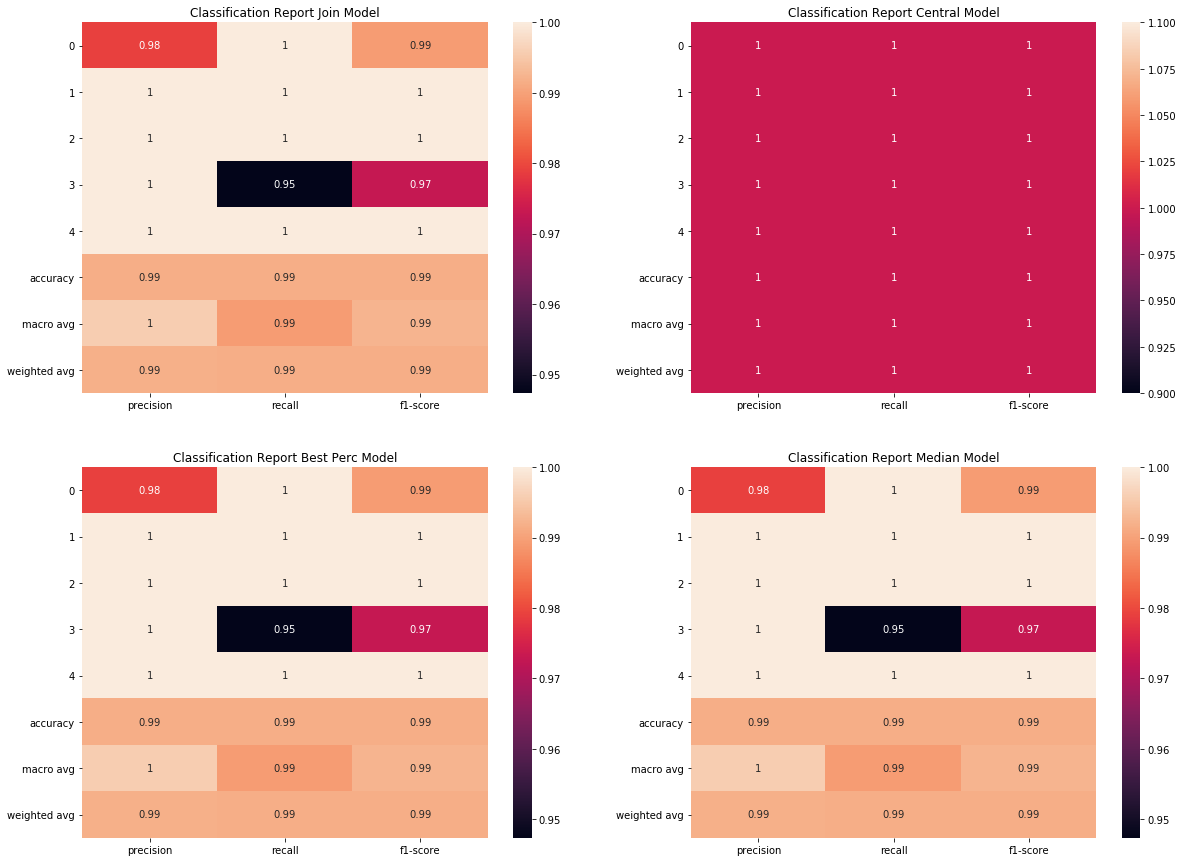

In [10]:
fig, ax =plt.subplots(2,2,figsize=(20,15))
sns.heatmap(pd.DataFrame(repJn).iloc[:-1, :].T, ax=ax[0][0], annot=True)
ax[0][0].set_title('Classification Report Join Model')
sns.heatmap(pd.DataFrame(centJn).iloc[:-1, :].T, ax=ax[0][1], annot=True)
ax[0][1].set_title('Classification Report Central Model')
sns.heatmap(pd.DataFrame(repBPr).iloc[:-1, :].T, ax=ax[1][0], annot=True)
ax[1][0].set_title('Classification Report Best Perc Model')
sns.heatmap(pd.DataFrame(repMdn).iloc[:-1, :].T, ax=ax[1][1], annot=True)
ax[1][1].set_title('Classification Report Median Model')
plt.show()